# Proyecto del Día 14 - Gestión Segura de Datos de Clientes

Este notebook implementa un sistema básico de gestión y análisis de datos de clientes, aplicando técnicas de pseudonimización, anonimización y balanceo de datos.


## Objetivo
El proyecto consiste en desarrollar un sistema de gestión y análisis de datos de clientes que implemente técnicas de pseudonimización, anonimización y balanceo de datos para proteger la privacidad de los usuarios y asegurar un análisis equitativo.


## Consignas del Proyecto
1. Cargar los datos de clientes provistos en un archivo CSV.
2. Aplicar técnicas de anonimización al campo `direccion`, `edad` y `salario` para proteger la identidad de los clientes.
3. Aplicar técnicas de pseudonimización al campo `nombre`.
4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.
5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.


Este proyecto te permitirá aplicar prácticas esenciales de privacidad de datos y técnicas de manipulación de datos en un entorno práctico, preparándote para desafíos similares en entornos profesionales.

¡Mucha suerte y que te diviertas!

### 0. Importar librerias

In [85]:
import pandas as pd
import numpy as np
import uuid
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Cargar los datos

In [70]:
df = pd.read_csv("clientes.csv")
df.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589


### 2. Aplicar técnicas de anonimización al campo `direccion`, `edad` y `salario` para proteger la identidad de los clientes.

In [71]:
df["direccion"] = np.random.permutation(df["direccion"])
df.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,125 Browning,62,0,61050
1,James Jones,989 Cummings,65,1,53824
2,Patricia Wilson,317 Sandburg,18,0,60281
3,Elizabeth Robinson,369 Naidu,21,1,42187
4,Charles Brown,316 Auden,21,1,37589


In [72]:
df["edad"] = ( df["edad"] // 10 ) * 10
df.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,125 Browning,60,0,61050
1,James Jones,989 Cummings,60,1,53824
2,Patricia Wilson,317 Sandburg,10,0,60281
3,Elizabeth Robinson,369 Naidu,20,1,42187
4,Charles Brown,316 Auden,20,1,37589


In [73]:
ruido = np.random.normal(
    0, 
    100, 
    size=df["salario"].shape
)

df["salario"] = df["salario"] + ruido
df.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,125 Browning,60,0,61257.480237
1,James Jones,989 Cummings,60,1,53830.017889
2,Patricia Wilson,317 Sandburg,10,0,60273.184604
3,Elizabeth Robinson,369 Naidu,20,1,42136.594855
4,Charles Brown,316 Auden,20,1,37423.805816


In [74]:
df_anonimizados = df.copy()

### 3. Aplicar técnicas de pseudonimización al campo `nombre`.

In [75]:
tokens_nombres = {}

def tokenizar(nombre):
    token = str(uuid.uuid4())
    tokens_nombres[token] = nombre
    return token

def recupear_nombre(token):
    return tokens_nombres[token]

In [76]:
df_anonimizados["nombre"] = df_anonimizados["nombre"].apply(tokenizar)
df_anonimizados.head()

,nombre,direccion,edad,categoria,salario
0,c2e301af-4c53-4b42-85be-cc452c9cc233,125 Browning,60,0,61257.480237
1,c19e67c0-387b-4002-9b13-37d3e9b3ab72,989 Cummings,60,1,53830.017889
2,655a7bb1-6fae-4d4c-b4fa-c392dd79e200,317 Sandburg,10,0,60273.184604
3,556c5de2-3b81-4abb-94aa-09e6b35f2ccd,369 Naidu,20,1,42136.594855
4,ef9e077b-1e18-427b-8ba3-79ca8b477830,316 Auden,20,1,37423.805816


In [79]:
df_pseudo = df_anonimizados.copy()

In [80]:
recupear_nombre(df_pseudo["nombre"][0])

'Richard Martin'

### 4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.

In [81]:
df_pseudo["categoria"].value_counts()

categoria
1    114
0     86
Name: count, dtype: int64

In [82]:
agrupado = df_pseudo.groupby('categoria')

df_balanceado = pd.DataFrame()

for nombre, grupo in agrupado:
    grupo_balanceado = resample(
        grupo,
        replace=True,
        n_samples=114,
        random_state=123
    )

    df_balanceado = pd.concat([df_balanceado, grupo_balanceado])

df_balanceado.head()

,nombre,direccion,edad,categoria,salario
158,b6996d5b-240a-4686-9203-917d45bbcce2,187 Goethe,50,0,41406.285456
42,473ca410-8017-431c-976f-64a8324e3a41,147 Dickinson,30,0,59329.936807
194,a143bacc-12c1-4a12-9318-c5c0bb36ca5e,745 Hesse,40,0,49741.244164
133,4f5e775b-5a8f-4c43-a734-84f27aa2d073,523 Goethe,50,0,41853.712723
114,4053a324-051c-461b-aee0-2377023cffdc,815 Whitman,60,0,53582.606637


In [83]:
df_balanceado["categoria"].value_counts()

categoria
0    114
1    114
Name: count, dtype: int64

### 5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.


[Text(0.5, 1.0, 'Histograma de Edad'),
 Text(0.5, 0, 'Edad'),
 Text(0, 0.5, 'Frecuencia')]

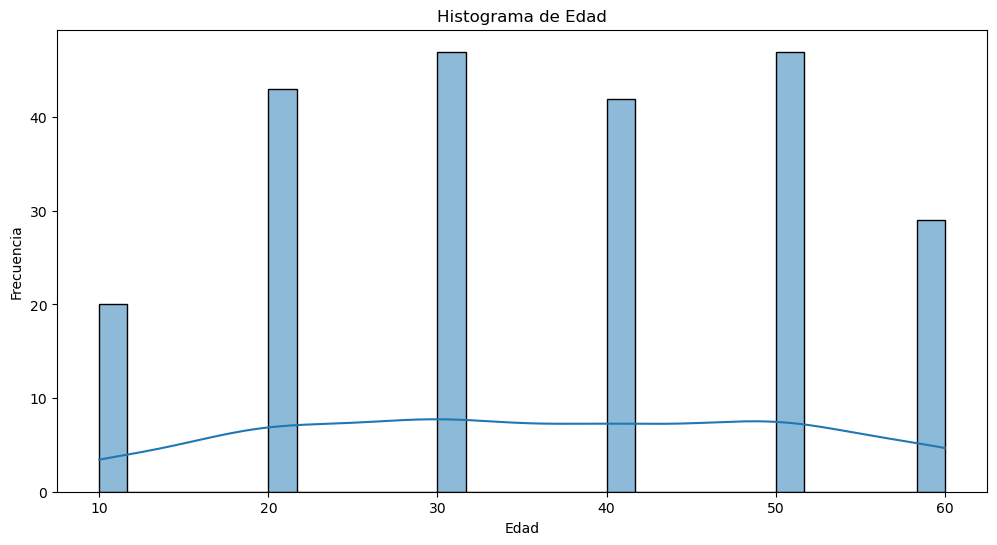

In [92]:
plt.figure(figsize=(12,6))
ax = sns.histplot(
    df_balanceado["edad"],
    kde=True,
    bins=30
)
ax.set(
    title="Histograma de Edad",
    xlabel="Edad",
    ylabel="Frecuencia"
)

[Text(0.5, 1.0, 'Scatterplot de Edad vs Salario'),
 Text(0.5, 0, 'Edad'),
 Text(0, 0.5, 'Salario')]

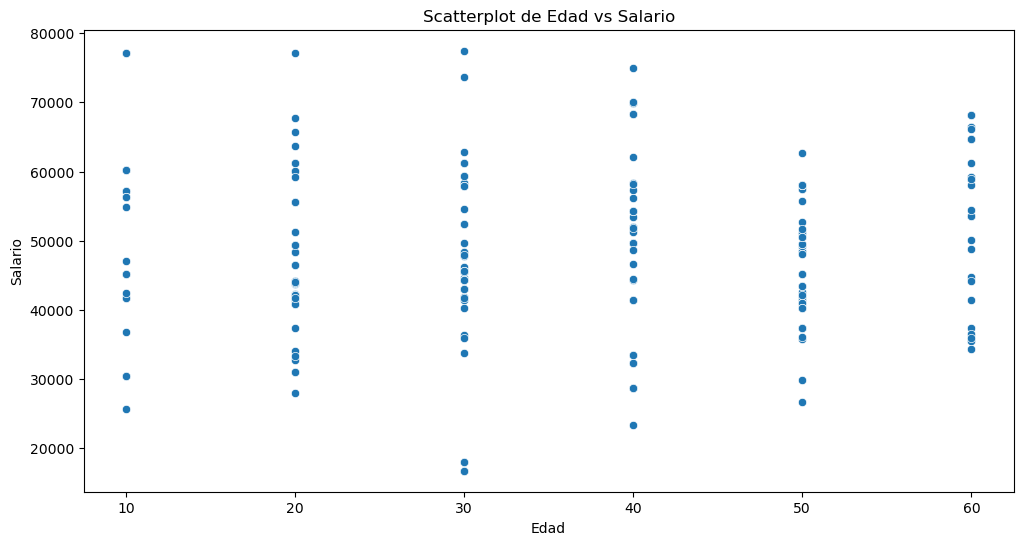

In [93]:
plt.figure(figsize=(12,6))
sizes = df_balanceado["categoria"].replace({0: 50, 1: 100})
scatter = sns.scatterplot(
    x="edad",
    y="salario",
    legend=False,
    sizes=sizes,
    data=df_balanceado
)
scatter.set(
    title="Scatterplot de Edad vs Salario",
    xlabel="Edad",
    ylabel="Salario"
)

[Text(0.5, 1.0, 'Matriz de Correlación')]

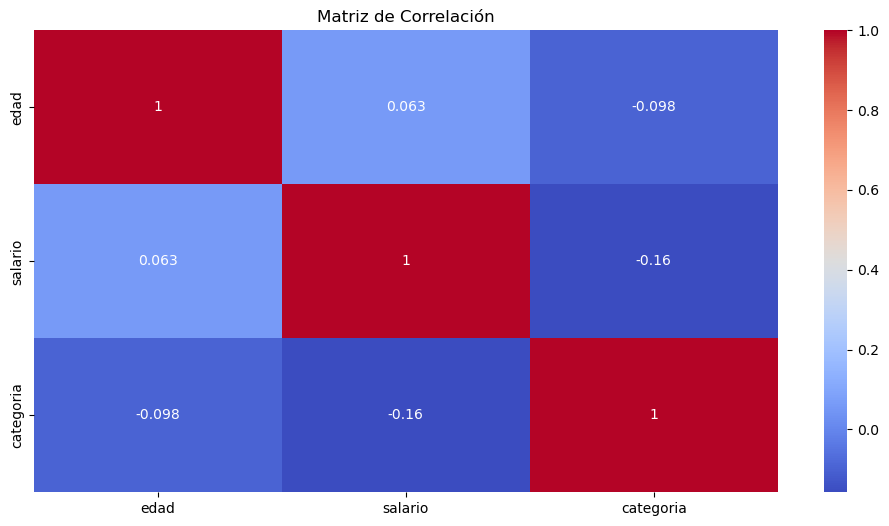

In [94]:
plt.figure(figsize=(12,6))
correlation_matrix = df_balanceado[["edad", "salario", "categoria"]].corr()
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm"
)
heatmap.set(
    title="Matriz de Correlación",
)